# Harris-Stephens Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

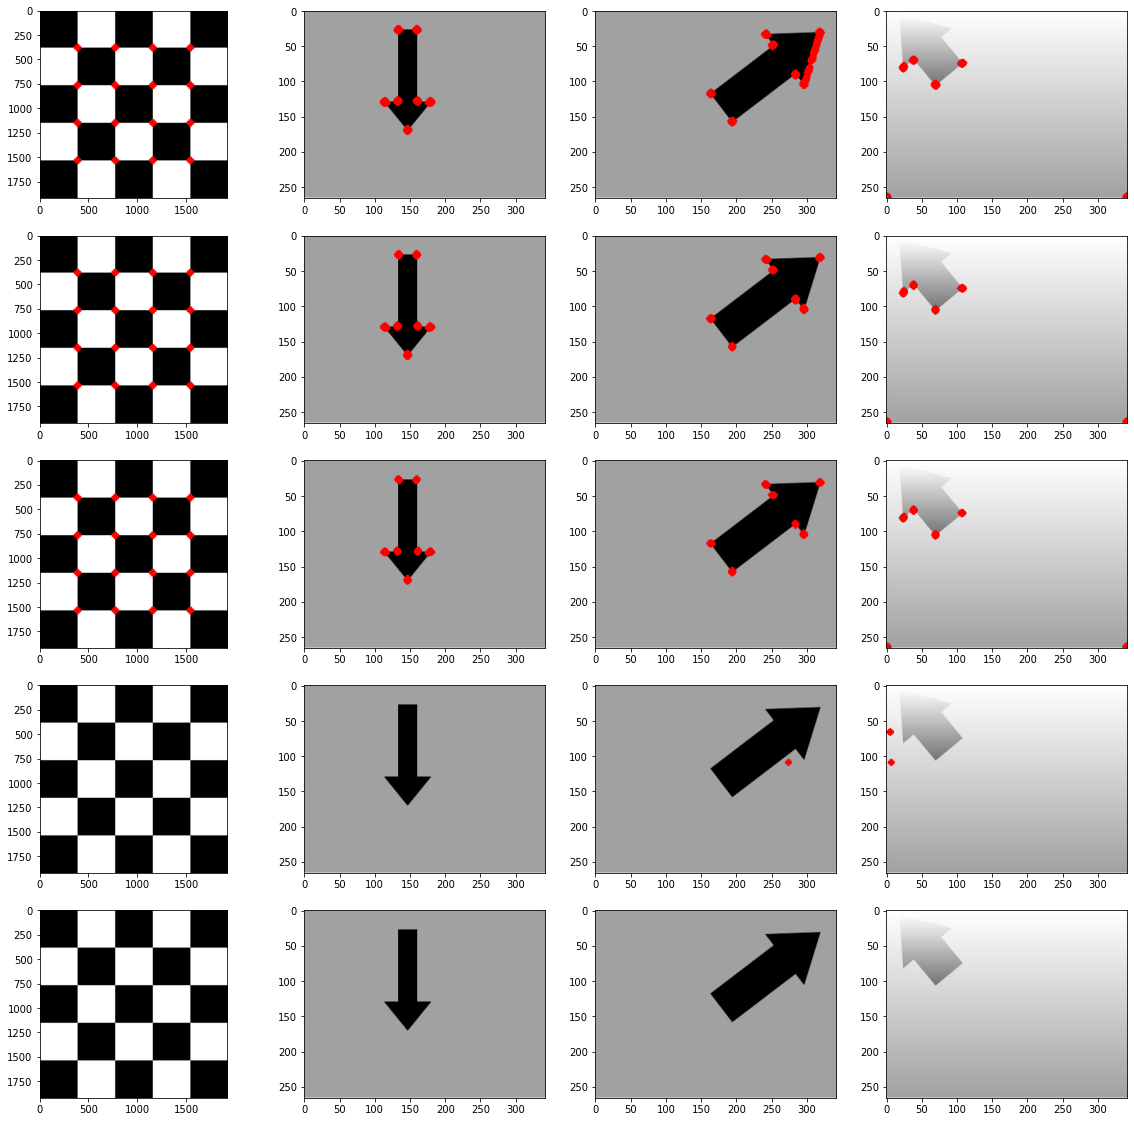

In [2]:
def draw_corners(img_path, k):
    Im = cv2.imread(f'./images/{img_path}', cv2.IMREAD_GRAYSCALE)
    corners = cv2.cornerHarris(Im, blockSize=3, ksize=3, k=k)
    marked = cv2.cvtColor(Im, cv2.COLOR_GRAY2RGB)
    max_val = 0.01*corners.max()
    scaled_size = Im.shape[0]//50

    for i, y in enumerate(corners):
        for j, x in enumerate(y):
            if x > max_val:
                marked = cv2.drawMarker(marked, (j, i), color=(255,0,0), markerType=cv2.MARKER_CROSS, markerSize=scaled_size, thickness=scaled_size)
                
    plt.imshow(marked)

paths = ['chessboard.png', 'arrow_1.jpg', 'arrow_2.jpg', 'arrow_3.jpg']
k_vals = [0.001, 0.04, 0.1, 0.25, 0.3]

plt.figure(figsize=(20,20))

for i, path in enumerate(paths):
    for j, k in enumerate(k_vals):
        plt.subplot(5, 4, (j*4)+i+1)
        draw_corners(path, k)

plt.show()

# SIFT Feature Detection

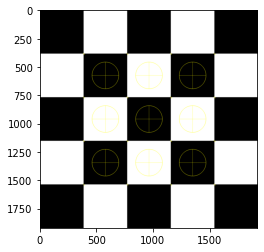

In [7]:
img = cv2.imread('images/chessboard.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()

kp = sift.detect(img, None)

out_img = cv2.drawKeypoints(img, kp, None, (255, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(out_img)